In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing dataset

mi = pd.read_csv("/Users/prathamesh/Desktop/Excelr-material/ML/Myocardial infarction complications.csv")
mi.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# EDA (Exploratory Data Analysis)

### Data Preprocessing

In [3]:
# Dropping Column ID which is not important for our analysis.

mi.drop(["ID"],axis=1,inplace=True)

In [4]:
# Count of duplicate values

mi.duplicated().sum()

0

In [5]:
# Datatype of variables

mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [6]:
# Count and percentage of null values present in Variables.

for i in mi.columns:
    if mi[i].isnull().sum() > 0:
        print(i, "-->", mi[i].isnull().sum() , "-->", int(np.round(mi[i].isnull().sum()/len(mi),2)*100),"%")

AGE --> 8 --> 0 %
INF_ANAM --> 4 --> 0 %
STENOK_AN --> 106 --> 6 %
FK_STENOK --> 73 --> 4 %
IBS_POST --> 51 --> 3 %
IBS_NASL --> 1628 --> 96 %
GB --> 9 --> 1 %
SIM_GIPERT --> 8 --> 0 %
DLIT_AG --> 248 --> 15 %
ZSN_A --> 54 --> 3 %
nr_11 --> 21 --> 1 %
nr_01 --> 21 --> 1 %
nr_02 --> 21 --> 1 %
nr_03 --> 21 --> 1 %
nr_04 --> 21 --> 1 %
nr_07 --> 21 --> 1 %
nr_08 --> 21 --> 1 %
np_01 --> 18 --> 1 %
np_04 --> 18 --> 1 %
np_05 --> 18 --> 1 %
np_07 --> 18 --> 1 %
np_08 --> 18 --> 1 %
np_09 --> 18 --> 1 %
np_10 --> 18 --> 1 %
endocr_01 --> 11 --> 1 %
endocr_02 --> 10 --> 1 %
endocr_03 --> 10 --> 1 %
zab_leg_01 --> 7 --> 0 %
zab_leg_02 --> 7 --> 0 %
zab_leg_03 --> 7 --> 0 %
zab_leg_04 --> 7 --> 0 %
zab_leg_06 --> 7 --> 0 %
S_AD_KBRIG --> 1076 --> 63 %
D_AD_KBRIG --> 1076 --> 63 %
S_AD_ORIT --> 267 --> 16 %
D_AD_ORIT --> 267 --> 16 %
O_L_POST --> 12 --> 1 %
K_SH_POST --> 15 --> 1 %
MP_TP_POST --> 14 --> 1 %
SVT_POST --> 12 --> 1 %
GT_POST --> 12 --> 1 %
FIB_G_POST --> 12 --> 1 %
ant_im --> 83 -

In [7]:
# dropping columns with maximum count of null values.

mi1 = mi.drop(["IBS_NASL","S_AD_KBRIG","D_AD_KBRIG","KFK_BLOOD"],axis=1)

In [8]:
# shape of dataframe before and after dropping columns.

print("Before --> ", mi.shape)
print()
print("After --> ", mi1.shape)

Before -->  (1700, 123)

After -->  (1700, 119)


In [9]:
mi1.tail(1)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1699,63.0,1,2.0,NaN,NaN,NaN,2.0,0.0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# filling missing values of columns having null count less than 112 with the help of interpolation technique

mi2 = mi1.copy(deep=True)
for i in mi2.columns:
    if mi2[i].isnull().sum() < 111 and mi2[i].isnull().sum() > 0:
        mi2[i] = mi2[i].interpolate(method = "linear",limit_direction = "forward")

In [11]:
# Count and percentage of null values present in Variables.

for i in mi2.columns:
    if mi2[i].isnull().sum() > 0:
        print(i, "-->", mi2[i].isnull().sum() , "-->", int(np.round(mi2[i].isnull().sum()/len(mi2),2)*100),"%")

DLIT_AG --> 248 --> 15 %
S_AD_ORIT --> 267 --> 16 %
D_AD_ORIT --> 267 --> 16 %
ritm_ecg_p_01 --> 152 --> 9 %
ritm_ecg_p_02 --> 152 --> 9 %
ritm_ecg_p_04 --> 152 --> 9 %
ritm_ecg_p_06 --> 152 --> 9 %
ritm_ecg_p_07 --> 152 --> 9 %
ritm_ecg_p_08 --> 152 --> 9 %
n_r_ecg_p_01 --> 115 --> 7 %
n_r_ecg_p_02 --> 115 --> 7 %
n_r_ecg_p_03 --> 115 --> 7 %
n_r_ecg_p_04 --> 115 --> 7 %
n_r_ecg_p_05 --> 115 --> 7 %
n_r_ecg_p_06 --> 115 --> 7 %
n_r_ecg_p_08 --> 115 --> 7 %
n_r_ecg_p_09 --> 115 --> 7 %
n_r_ecg_p_10 --> 115 --> 7 %
n_p_ecg_p_01 --> 115 --> 7 %
n_p_ecg_p_03 --> 115 --> 7 %
n_p_ecg_p_04 --> 115 --> 7 %
n_p_ecg_p_05 --> 115 --> 7 %
n_p_ecg_p_06 --> 115 --> 7 %
n_p_ecg_p_07 --> 115 --> 7 %
n_p_ecg_p_08 --> 115 --> 7 %
n_p_ecg_p_09 --> 115 --> 7 %
n_p_ecg_p_10 --> 115 --> 7 %
n_p_ecg_p_11 --> 115 --> 7 %
n_p_ecg_p_12 --> 115 --> 7 %
GIPO_K --> 369 --> 22 %
K_BLOOD --> 371 --> 22 %
GIPER_NA --> 375 --> 22 %
NA_BLOOD --> 375 --> 22 %
ALT_BLOOD --> 284 --> 17 %
AST_BLOOD --> 285 --> 17 %
L_BLOO

In [12]:
mi2.tail(1)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1699,63.0,1,2.0,2.0,2.0,1.0,2.0,0.0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# filling missing values of remaining columns with the help of fillna() function and median central tendency

mi3 = mi2.copy(deep=True)
for i in mi3.columns:
    if mi3[i].isnull().sum() > 0:
        mi3[i] = mi3[i].fillna(mi3[i].median())

In [14]:
# Count and percentage of null values present in Variables.

for i in mi3.columns:
    if mi3[i].isnull().sum() > 0:
        print(i, "-->", mi3[i].isnull().sum() , "-->", int(np.round(mi3[i].isnull().sum()/len(mi3),2)*100),"%")

In [15]:
mi3.tail(1)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1699,63.0,1,2.0,2.0,2.0,1.0,2.0,0.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,1


### Feature Selection

In [16]:
"""
We are using PCA technique to estimate the number of columns to provide for parameter k in SelectKBest() method 
which is used for feature selection or feature enginnering. And we are also using KNN algorrithm to see how 
different numbers of columns are giving different accuracy.
"""

'\nWe are using PCA technique to estimate the number of columns to provide for parameter k in SelectKBest() method \nwhich is used for feature selection or feature enginnering. And we are also using KNN algorrithm to see how \ndifferent numbers of columns are giving different accuracy.\n'

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
# standardizing data before applying PCA

mi_stand = StandardScaler().fit_transform(mi3.iloc[:,:-1])

In [19]:
# PCA

pca = PCA()
pca_fitted = pca.fit_transform(mi_stand)

In [20]:
# total variance explained by each column

explained = pca.explained_variance_ratio_
explained

array([3.46679739e-02, 2.84016743e-02, 2.72231185e-02, 2.41347865e-02,
       2.12842639e-02, 1.87383621e-02, 1.74738599e-02, 1.56978356e-02,
       1.55694004e-02, 1.50746246e-02, 1.44812504e-02, 1.40127028e-02,
       1.38876048e-02, 1.32611530e-02, 1.31567802e-02, 1.27189694e-02,
       1.25079337e-02, 1.22898608e-02, 1.22259103e-02, 1.19142704e-02,
       1.18005529e-02, 1.15107771e-02, 1.13983985e-02, 1.13508848e-02,
       1.11240072e-02, 1.07672121e-02, 1.07489104e-02, 1.06436679e-02,
       1.06064422e-02, 1.03647282e-02, 1.02787821e-02, 1.01189680e-02,
       1.00487717e-02, 9.90951691e-03, 9.85117330e-03, 9.63607752e-03,
       9.54411948e-03, 9.38282517e-03, 9.32013150e-03, 9.21785903e-03,
       9.12271108e-03, 9.04137875e-03, 8.94130516e-03, 8.84760634e-03,
       8.82350455e-03, 8.77234199e-03, 8.67689306e-03, 8.59280336e-03,
       8.55759792e-03, 8.45596758e-03, 8.31679158e-03, 8.22681176e-03,
       8.22365840e-03, 8.16501806e-03, 8.08650910e-03, 8.02481874e-03,
      

In [21]:
cumulative = np.cumsum(np.round(explained,4)*100)
cumulative

array([  3.47,   6.31,   9.03,  11.44,  13.57,  15.44,  17.19,  18.76,
        20.32,  21.83,  23.28,  24.68,  26.07,  27.4 ,  28.72,  29.99,
        31.24,  32.47,  33.69,  34.88,  36.06,  37.21,  38.35,  39.49,
        40.6 ,  41.68,  42.75,  43.81,  44.87,  45.91,  46.94,  47.95,
        48.95,  49.94,  50.93,  51.89,  52.84,  53.78,  54.71,  55.63,
        56.54,  57.44,  58.33,  59.21,  60.09,  60.97,  61.84,  62.7 ,
        63.56,  64.41,  65.24,  66.06,  66.88,  67.7 ,  68.51,  69.31,
        70.1 ,  70.88,  71.64,  72.4 ,  73.15,  73.89,  74.63,  75.37,
        76.09,  76.8 ,  77.49,  78.17,  78.85,  79.51,  80.17,  80.82,
        81.46,  82.09,  82.72,  83.33,  83.93,  84.53,  85.12,  85.7 ,
        86.28,  86.85,  87.42,  87.98,  88.53,  89.07,  89.6 ,  90.12,
        90.63,  91.13,  91.63,  92.11,  92.58,  93.05,  93.51,  93.96,
        94.4 ,  94.83,  95.25,  95.65,  96.04,  96.42,  96.78,  97.13,
        97.46,  97.77,  98.07,  98.35,  98.61,  98.86,  99.09,  99.3 ,
      

In [22]:
df = pd.DataFrame(pca_fitted)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,1.677712,-2.350459,-0.860113,-0.173445,0.353157,-0.131296,2.060379,0.345343,0.889088,-2.595796,...,-0.283143,-0.554079,0.163471,0.956096,-0.955661,0.022585,0.296115,1.942129,0.834011,0.004551
1,-2.402752,1.780780,0.534810,-2.514277,0.322097,-1.572703,-0.933202,-0.922719,0.087727,0.581886,...,-0.119088,0.507039,0.063305,0.241425,-0.124220,0.138939,0.103150,-0.324654,0.464852,0.000298
2,-0.704759,-0.217076,4.374135,-4.217052,-1.413562,2.492600,1.481448,-1.644285,-0.867730,2.935044,...,-0.909599,-0.153720,0.131888,-0.439509,0.158888,-0.104883,0.366906,0.207459,-0.460804,0.010253
3,-0.538406,-0.596880,-0.276874,0.195767,-0.417713,0.402006,0.976648,-0.867348,0.312502,-0.510519,...,0.444216,0.354787,0.043899,0.967603,-0.217096,0.558488,0.485308,-0.007886,-0.061253,-0.000468
4,-0.815016,-1.597766,-0.658840,-0.855832,1.993644,-1.243140,1.507028,-2.066142,0.008894,0.171993,...,0.135559,0.902054,0.046297,-0.245215,-0.043279,0.189471,0.122252,0.132452,-0.309644,0.005439


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Splitting dataset

x = df.iloc[:,:11]
y = mi3.iloc[:,-1:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
test_score = []
y = mi3.iloc[:,-1:]
for i in range(1,118):
    x = df.iloc[:,:i]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
    model1 = KNeighborsClassifier()                   
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    test_score.append(model1.score(x_test, y_test))
    print("test score for model with ", i , "component is -->" , model1.score(x_test, y_test))
    


test score for model with  1 component is --> 0.8313725490196079
test score for model with  2 component is --> 0.8392156862745098
test score for model with  3 component is --> 0.8490196078431372
test score for model with  4 component is --> 0.8470588235294118
test score for model with  5 component is --> 0.8568627450980392
test score for model with  6 component is --> 0.8549019607843137
test score for model with  7 component is --> 0.8490196078431372
test score for model with  8 component is --> 0.8490196078431372
test score for model with  9 component is --> 0.8490196078431372
test score for model with  10 component is --> 0.8607843137254902
test score for model with  11 component is --> 0.8607843137254902
test score for model with  12 component is --> 0.8666666666666667
test score for model with  13 component is --> 0.8607843137254902
test score for model with  14 component is --> 0.8627450980392157
test score for model with  15 component is --> 0.8588235294117647
test score for mode

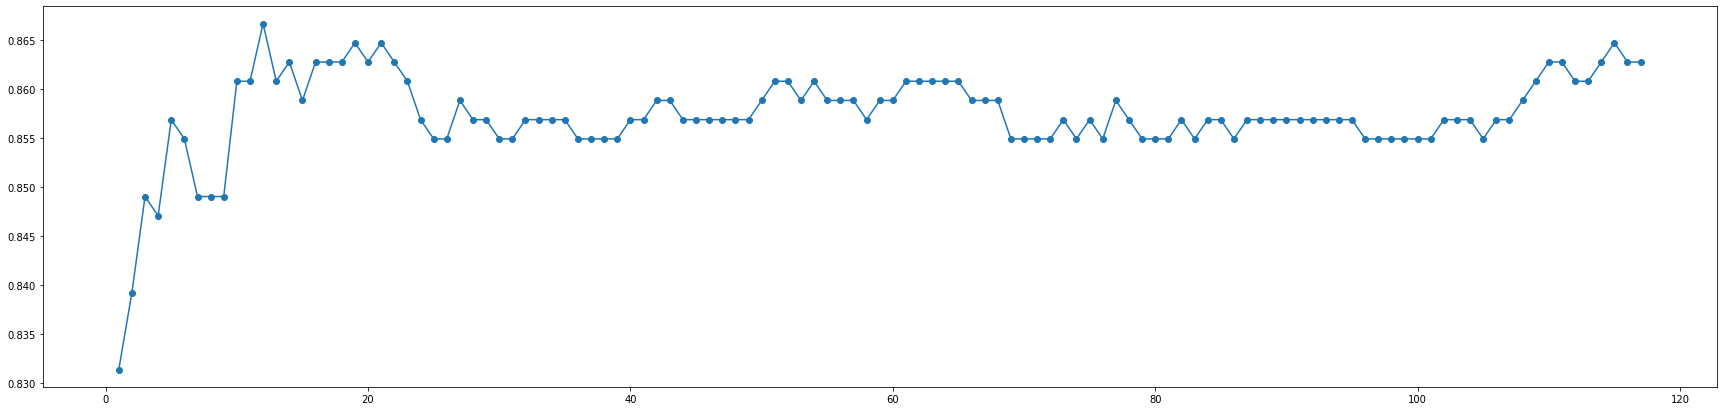

In [25]:
plt.figure(figsize=(30,7))
plt.plot(range(1,118),test_score,marker = 'o')

In [26]:
# maximum score obtained

max(test_score)

0.8666666666666667

#### ** From PCA technique we can conclude that model with first 12 components is giving maximum accuracy.

In [27]:
from sklearn.feature_selection import SelectKBest, chi2

In [28]:
# SelectKBest

y = mi3.iloc[:,-1:]
test_score = []
for i in range(1,118):
    x = mi3.iloc[:,:-1]
    new_x = SelectKBest(score_func=chi2,k=i).fit(x,y)
    index = new_x.get_support(indices = True)
    df1 = x[x.columns[index]]
    x_stand = StandardScaler().fit_transform(df1)
    x_train,x_test,y_train,y_test = train_test_split(x_stand,y,test_size=0.3,random_state=42)
    model = KNeighborsClassifier()                   
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    test_score.append(model.score(x_test, y_test))
    print("test score for model with ", i , "columns is -->" , model.score(x_test, y_test))

test score for model with  1 columns is --> 0.8666666666666667
test score for model with  2 columns is --> 0.8803921568627451
test score for model with  3 columns is --> 0.8823529411764706
test score for model with  4 columns is --> 0.8960784313725491
test score for model with  5 columns is --> 0.8960784313725491
test score for model with  6 columns is --> 0.8960784313725491
test score for model with  7 columns is --> 0.8941176470588236
test score for model with  8 columns is --> 0.8921568627450981
test score for model with  9 columns is --> 0.8941176470588236
test score for model with  10 columns is --> 0.8980392156862745
test score for model with  11 columns is --> 0.8941176470588236
test score for model with  12 columns is --> 0.8921568627450981
test score for model with  13 columns is --> 0.888235294117647
test score for model with  14 columns is --> 0.8901960784313725
test score for model with  15 columns is --> 0.8941176470588236
test score for model with  16 columns is --> 0.894

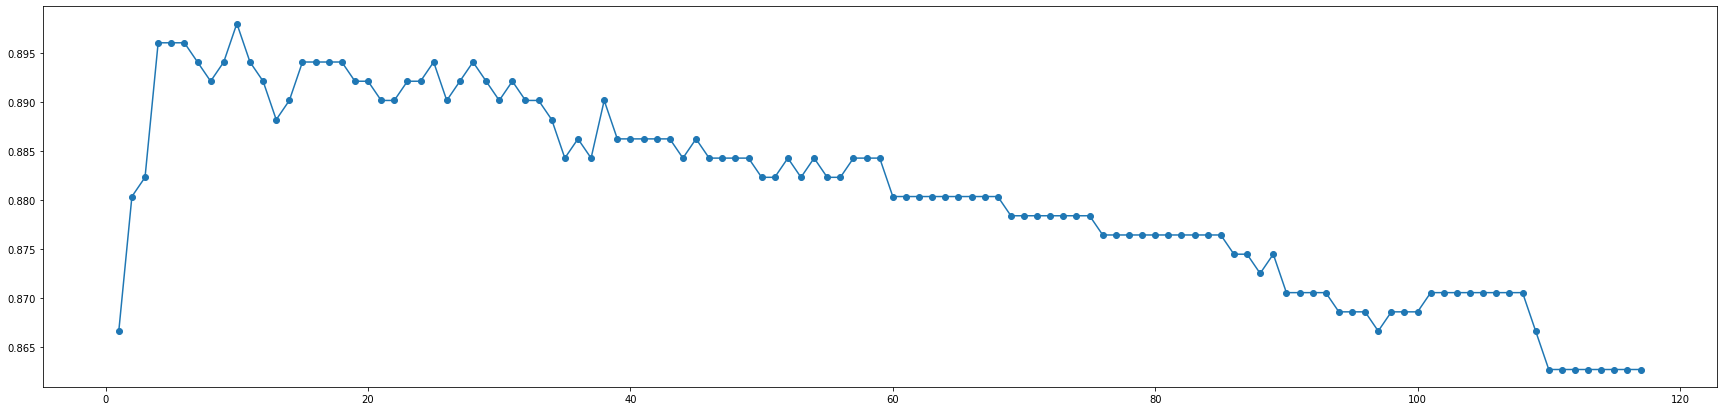

In [29]:
plt.figure(figsize=(30,7))
plt.plot(range(1,118),test_score,marker = 'o')

In [30]:
# maximum score obtained

max(test_score)

0.8980392156862745

#### ** From SelectKBest technique we can conclude that model with only top 10 best columns is giving maximum accuracy.

# 

#### ** With the help of SelectKBest and PCA method we can further proceed with dataset contaning only 10 columns. 

In [31]:
y = mi3.iloc[:,-1:]
x = mi3.iloc[:,:-1]
new_x = SelectKBest(score_func=chi2,k=10).fit(x,y)
index = new_x.get_support(indices = True)
topk_mi = x[x.columns[index]]
topk_mi = pd.concat([topk_mi,y],axis=1)
topk_mi

,AGE,STENOK_AN,ZSN_A,S_AD_ORIT,D_AD_ORIT,K_SH_POST,ant_im,ROE,FIBR_JELUD,RAZRIV,LET_IS
0,77.0,1.0,0.0,180.0,100.0,0.0,1.0,16.0,0,0,0
1,55.0,0.0,0.0,120.0,90.0,0.0,4.0,3.0,0,0,0
2,52.0,0.0,0.0,180.0,100.0,0.0,4.0,10.0,0,0,0
3,68.0,0.0,1.0,120.0,70.0,0.0,0.0,10.0,0,0,0
4,60.0,0.0,0.0,160.0,90.0,0.0,4.0,10.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,4.0,0.0,110.0,70.0,0.0,2.0,6.0,0,1,3
1696,70.0,6.0,0.0,50.0,0.0,1.0,0.0,10.0,0,0,1
1697,55.0,6.0,0.0,70.0,50.0,0.5,4.0,13.0,0,0,6
1698,79.0,2.0,2.0,110.0,70.0,0.0,2.0,4.0,0,0,1


DESCRIPTION OF DATA

AGE : Age of patient.

STENOK_AN : Exertional angina pectoris in the anamnesis. 0: never 1: during the last year 2: one year ago 3: two years ago 4: three years ago 5: 4-5 years ago.

ZSN_AN : Presence of chronic Heart failure (HF) in the anamnesis: Partially ordered attribute: there are two lines of severities: 0<1<2<4, 0<1<3<4. State 4 means simultaneous states 2 and 3 0: there is no chronic heart failure 1: I stage 2: II stage (heart failure due to right ventricular systolic dysfunction) 3: II stage (heart failure due to left ventricular systolic dysfunction) 4: IIB stage (heart failure due to left and right ventricular systolic dysfunction).

S_AD_ORIT : Systolic blood pressure according to intensive care unit. (mmHg)

D_AD_ORIT : Diastolic blood pressure according to intensive care unit. (mmHg)

K_SH_POST : Cardiogenic shock at the time of admission to intensive care unit.

ant_im : Presence of an anterior myocardial infarction (left ventricular) (ECG changes in leads V1: V4 ) 0: there is no infarct in this location 1: QRS has no changes 2: QRS is like QR-complex 3: QRS is like Qr-complex 4: QRS is like QS-complex.

ROE : ESR (Erythrocyte sedimentation rate) (MM)

FIBR_JELUD : Ventricular fibrillation.

RAZRIV : Myocardial rupture.


In [32]:
topk_mi.describe()

,AGE,STENOK_AN,ZSN_A,S_AD_ORIT,D_AD_ORIT,K_SH_POST,ant_im,ROE,FIBR_JELUD,RAZRIV,LET_IS
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.869412,2.341765,0.208529,133.867647,82.317647,0.027353,1.585294,13.033529,0.041765,0.031765,0.477059
std,11.263394,2.406999,0.675320,28.828359,16.849723,0.162706,1.692453,10.658736,0.200110,0.175425,1.381818
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,120.000000,80.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,63.000000,2.000000,0.000000,130.000000,80.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000
75%,70.000000,5.000000,0.000000,150.000000,90.000000,0.000000,4.000000,17.000000,0.000000,0.000000,0.000000
max,92.000000,6.000000,4.000000,260.000000,190.000000,1.000000,4.000000,140.000000,1.000000,1.000000,7.000000


### Data Visualization

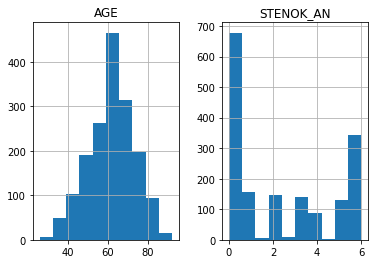

In [33]:
topk_mi.iloc[:,:2].hist()
plt.show()

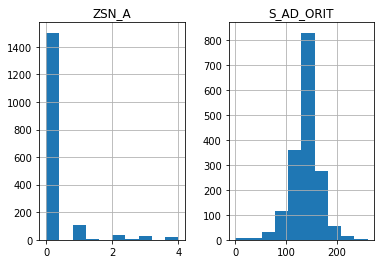

In [34]:
topk_mi.iloc[:,2:4].hist()
plt.show()

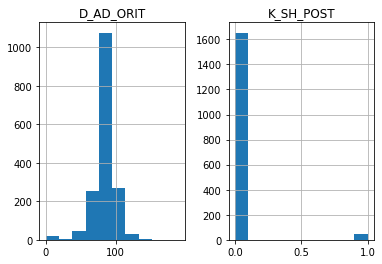

In [35]:
topk_mi.iloc[:,4:6].hist()
plt.show()

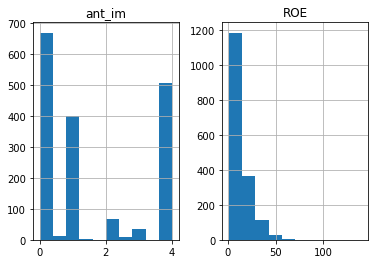

In [36]:
topk_mi.iloc[:,6:8].hist()
plt.show()

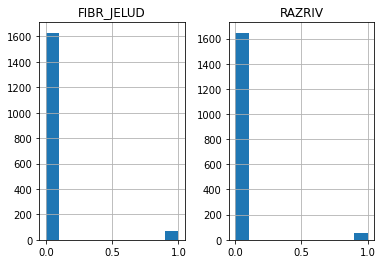

In [37]:
topk_mi.iloc[:,8:10].hist()
plt.show()

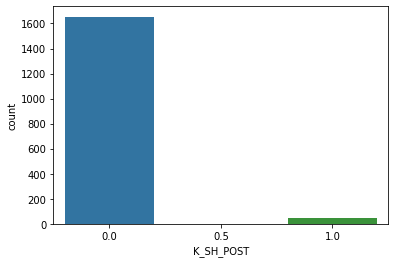

In [38]:
sns.countplot("K_SH_POST",data=topk_mi)
plt.show()

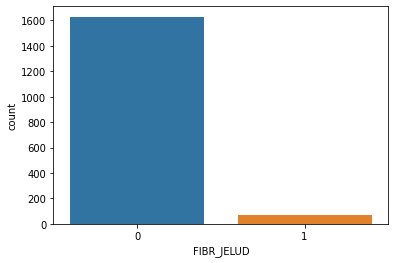

In [39]:
sns.countplot("FIBR_JELUD",data=topk_mi)
plt.show()

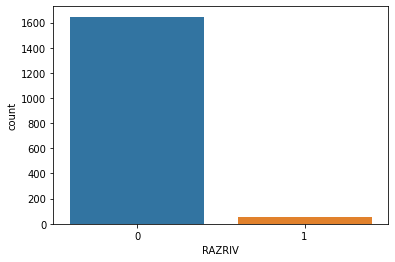

In [40]:
sns.countplot("RAZRIV",data=topk_mi)
plt.show()

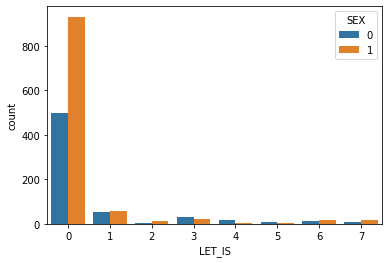

In [41]:
sns.countplot("LET_IS",data=mi,hue="SEX")
plt.show()

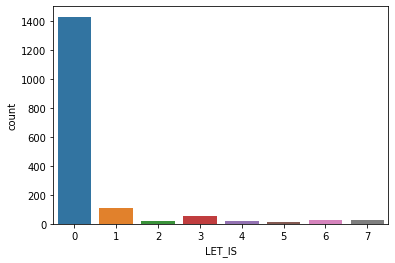

In [42]:
sns.countplot("LET_IS",data=topk_mi)
plt.show()

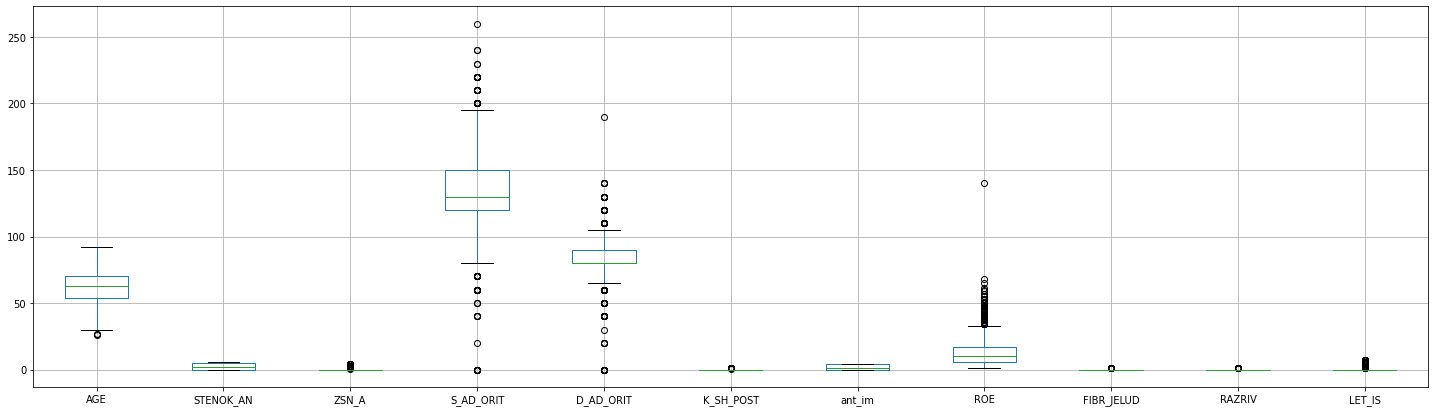

In [43]:
# checking for outliers

plt.figure(figsize=(25,7))
topk_mi.boxplot()
plt.show()

In [44]:
# significant amount of outliers are present in dataset. Therefore removal of outlier can cause loss of information.

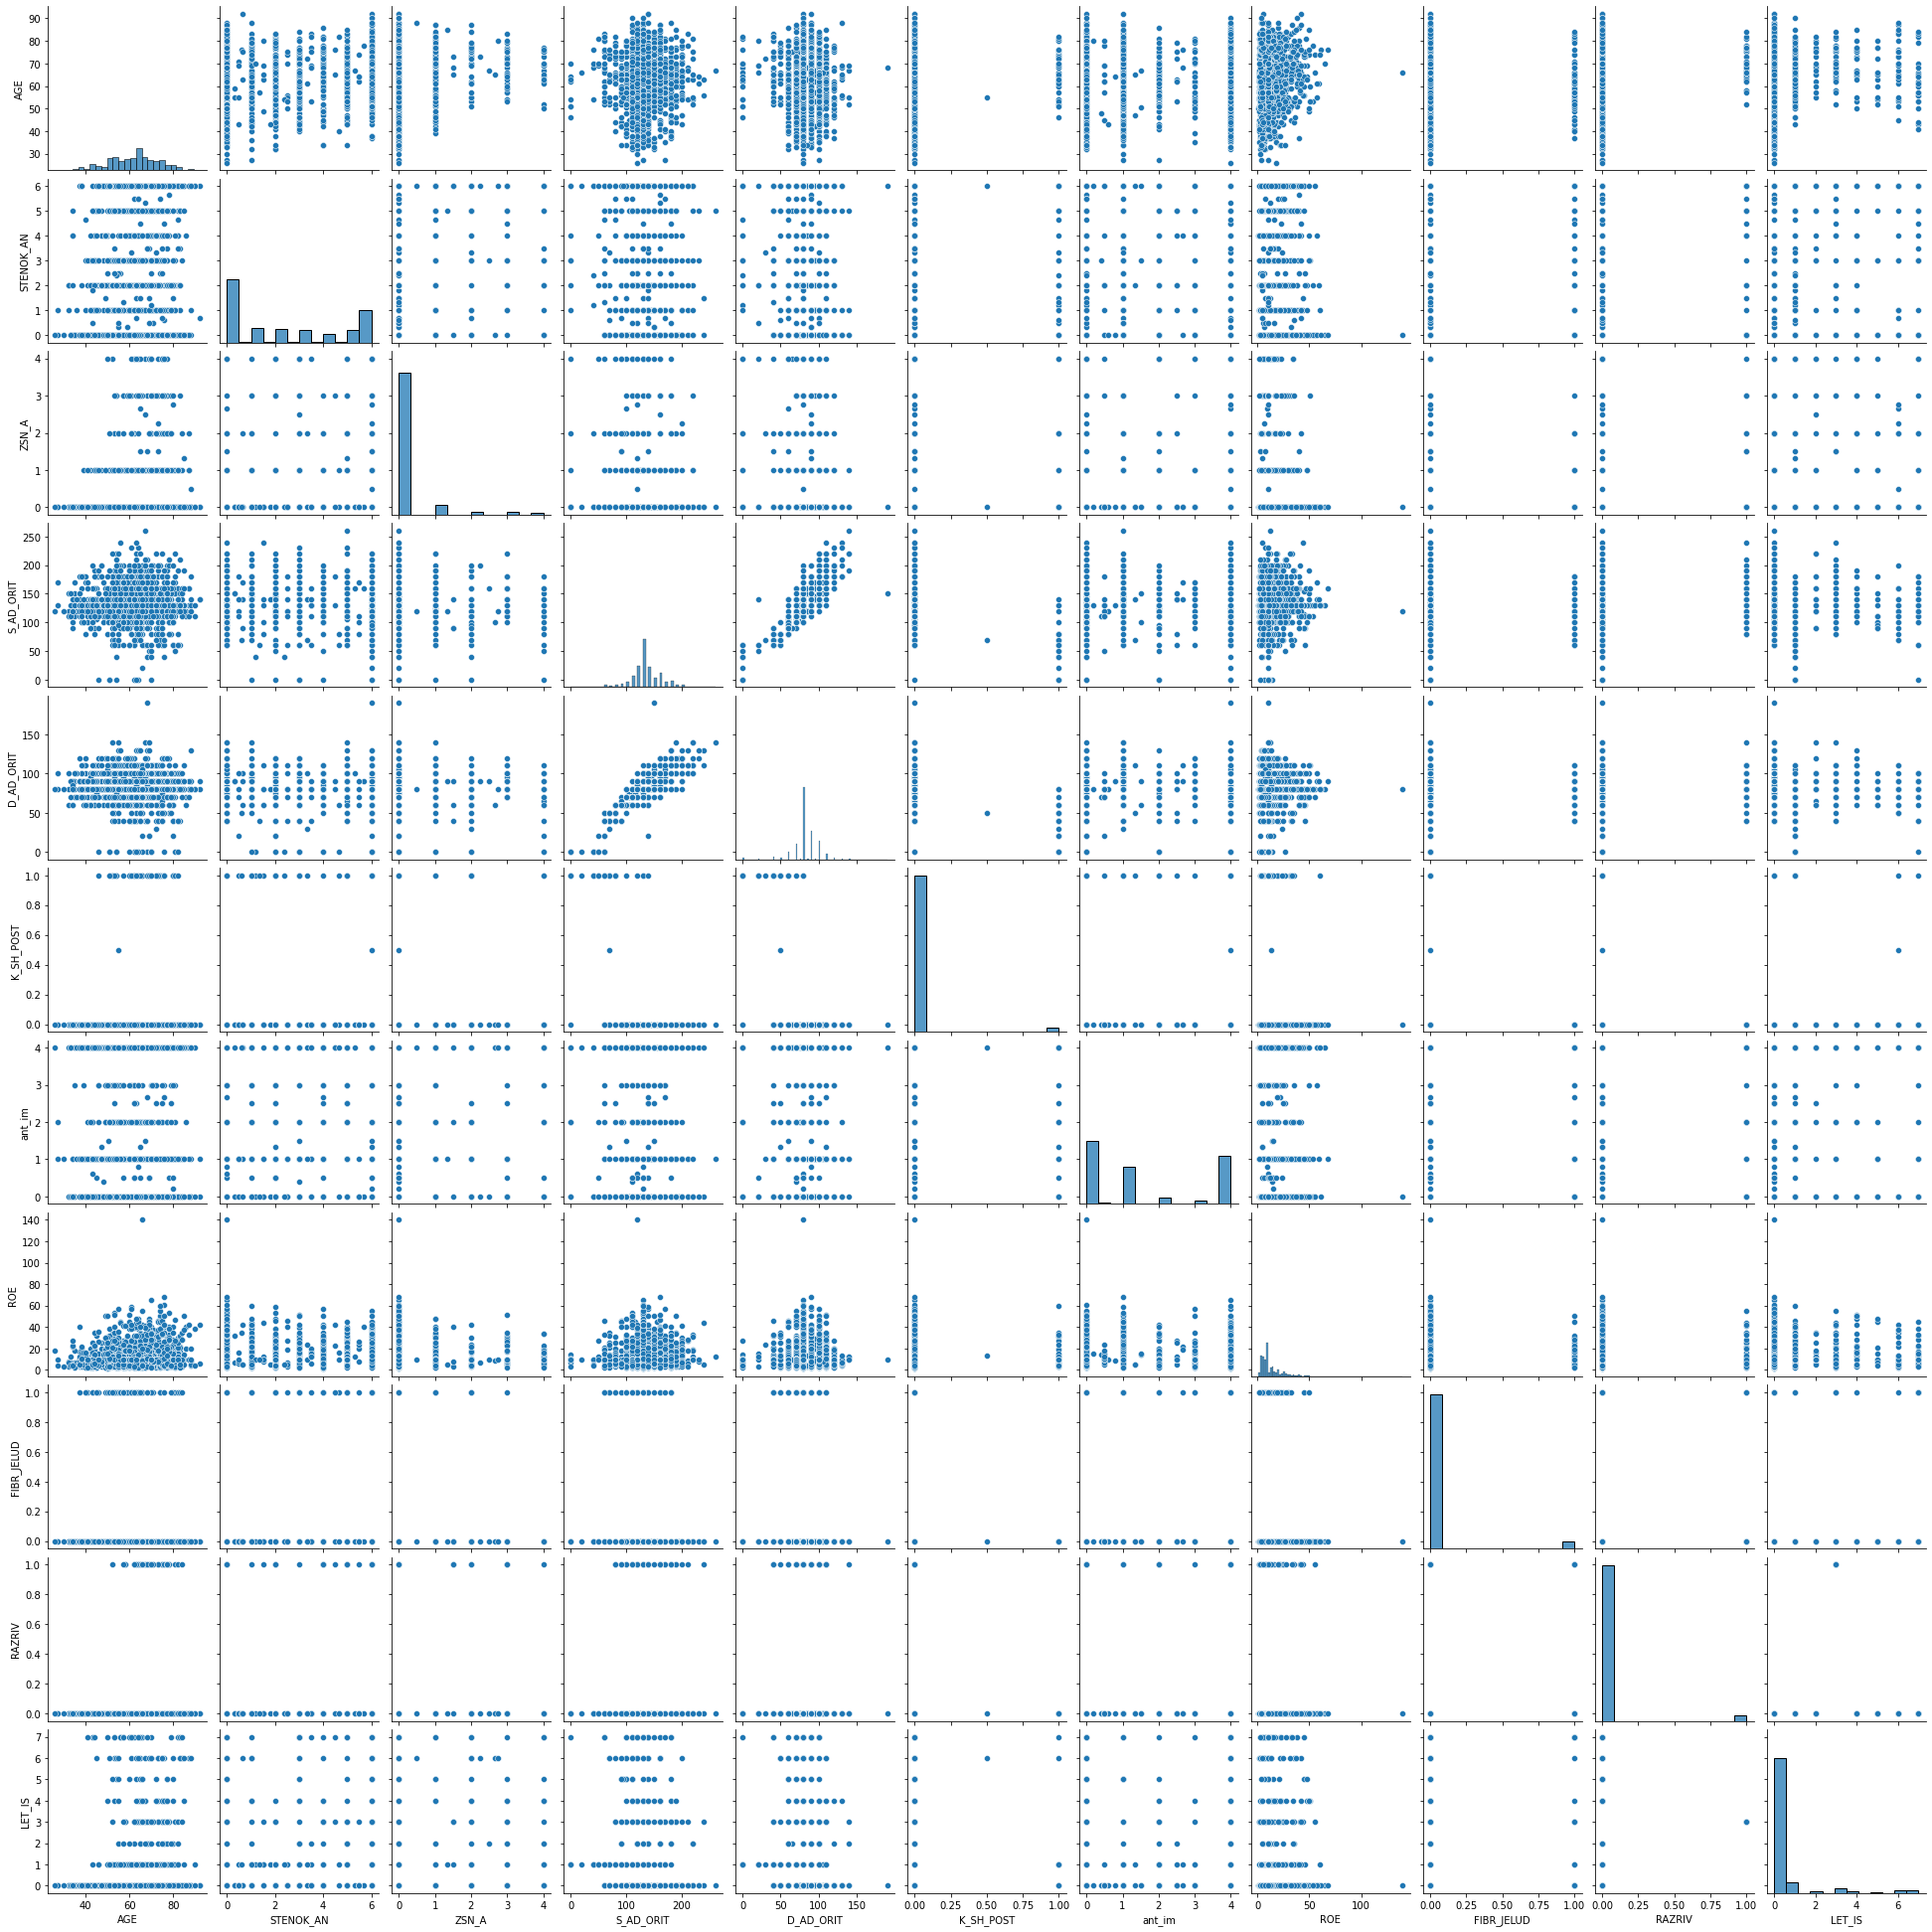

In [45]:
sns.pairplot(topk_mi)
plt.show()

#### ** From above every data visualization we can conclude that dataset is highly imbalanced. Which we can cure by applying SMOTE.

# 

# Model Building and Evaluation

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold,cross_val_score
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

In [47]:
# splitting of dataset

x = topk_mi.iloc[:,:-1]
y = topk_mi.iloc[:,-1:]


# Applying SMOTE() function to balanced imbalanced dataset.

smt = SMOTE()
x_smt, y_smt = smt.fit_resample(x, y)


# standardizing data

x_stand = StandardScaler().fit_transform(x_smt)

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x_stand,y_smt,test_size=0.3,random_state=42)

In [49]:
from xgboost import XGBClassifier

XGBOOST
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.9755102040816327
train score  1.0

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[414   8   0   0   3   2   1   2]
 [ 12 406   1   0   2   1   1   2]
 [  5   1 443   0   1   0   3   1]
 [  0   0   0 442   0   0   0   0]
 [  3   0   1   0 404   1   0   0]
 [  1   0   0   0   0 420   0   0]
 [  5   1   4   0   0   0 434   3]
 [  9   2   3   0   1   1   3 383]]


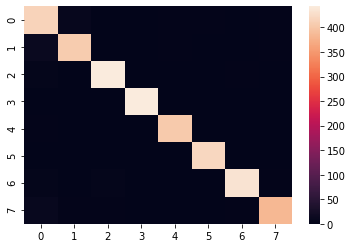


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       430
           1       0.97      0.96      0.96       425
           2       0.98      0.98      0.98       454
           3       1.00      1.00      1.00       442
           4       0.98      0.99      0.99       409
           5       0.99      1.00      0.99       421
           6       0.98      0.97      0.98       447
           7       0.98      0.95      0.97       402

    accuracy                           0.98      3430
   macro avg       0.98      0.98      0.98      3430
weighted avg       0.98      0.98      0.98      3430



In [50]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train,y_train)
y_pred = xgboost_model.predict(x_test)

print("XGBOOST")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , xgboost_model.score(x_test, y_test))
print("train score " , xgboost_model.score(x_train, y_train))
print()
if abs((xgboost_model.score(x_train, y_train))-(xgboost_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")


print()
print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

# 

KNN
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.928862973760933
train score  0.9476380904773807

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[270  34  13   0  30  24  24  35]
 [  7 388   5   0   2   7   7   9]
 [  0   0 450   0   1   0   2   1]
 [  0   0   0 442   0   0   0   0]
 [  0   0   2   0 404   1   1   1]
 [  0   0   0   0   0 421   0   0]
 [  2   3   7   0   1   1 430   3]
 [  3   6   3   0   2   1   6 381]]


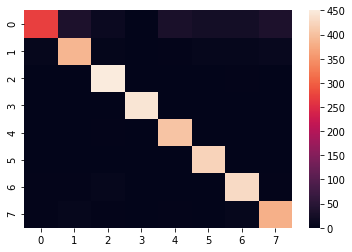


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.63      0.76       430
           1       0.90      0.91      0.91       425
           2       0.94      0.99      0.96       454
           3       1.00      1.00      1.00       442
           4       0.92      0.99      0.95       409
           5       0.93      1.00      0.96       421
           6       0.91      0.96      0.94       447
           7       0.89      0.95      0.92       402

    accuracy                           0.93      3430
   macro avg       0.93      0.93      0.92      3430
weighted avg       0.93      0.93      0.92      3430



In [51]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)

print("KNN")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , knn_model.score(x_test, y_test))
print("train score " , knn_model.score(x_train, y_train))
print()
if abs((knn_model.score(x_train, y_train))-(knn_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")

print()

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

# 

In [52]:
from sklearn.linear_model import LogisticRegression

Logistic Regression
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.5620991253644315
train score  0.5466133466633342

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[236   7  26   0  34  51  23  53]
 [ 49 221  28   0   1  55  41  30]
 [ 11  23 160   0 100  30 107  23]
 [  0   0   0 442   0   0   0   0]
 [ 27   8  60   0 235  31  18  30]
 [ 24   0  43   0  16 256  25  57]
 [ 20  25  83   0  51  84 154  30]
 [ 86  27  15   0   1  24  25 224]]


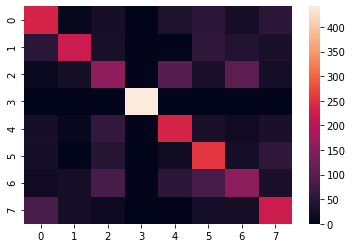


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.55      0.53       430
           1       0.71      0.52      0.60       425
           2       0.39      0.35      0.37       454
           3       1.00      1.00      1.00       442
           4       0.54      0.57      0.55       409
           5       0.48      0.61      0.54       421
           6       0.39      0.34      0.37       447
           7       0.50      0.56      0.53       402

    accuracy                           0.56      3430
   macro avg       0.57      0.56      0.56      3430
weighted avg       0.57      0.56      0.56      3430



In [53]:
LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)
y_pred = LR_model.predict(x_test)

print("Logistic Regression")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , LR_model.score(x_test, y_test))
print("train score " , LR_model.score(x_train, y_train))
print()
if abs((LR_model.score(x_train, y_train))-(LR_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")

print()

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

# 

In [54]:
from sklearn.svm import SVC

Support Vector Machine
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.8405247813411079
train score  0.8446638340414896

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[292  23  17   0  27  26  18  27]
 [ 32 318  15   0   5  20  11  24]
 [  0   2 397   0  14  31   1   9]
 [  0   0   0 442   0   0   0   0]
 [  0  10   5   0 377   5   2  10]
 [  1   0   0   0   1 404  15   0]
 [ 34  13  38   0   5  13 326  18]
 [ 44   8   7   0   3   6   7 327]]


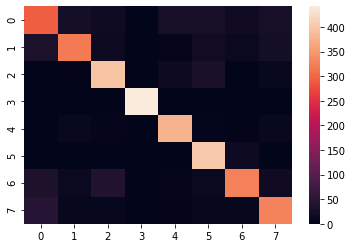


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       430
           1       0.85      0.75      0.80       425
           2       0.83      0.87      0.85       454
           3       1.00      1.00      1.00       442
           4       0.87      0.92      0.90       409
           5       0.80      0.96      0.87       421
           6       0.86      0.73      0.79       447
           7       0.79      0.81      0.80       402

    accuracy                           0.84      3430
   macro avg       0.84      0.84      0.84      3430
weighted avg       0.84      0.84      0.84      3430



In [55]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print("Support Vector Machine")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , svm_model.score(x_test, y_test))
print("train score " , svm_model.score(x_train, y_train))
print()
if abs((svm_model.score(x_train, y_train))-(svm_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")

print()

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

In [56]:
from sklearn.ensemble import RandomForestClassifier

Random Forest Classifier
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.9708454810495627
train score  1.0

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[384  16   3   0   9   5   6   7]
 [ 10 408   1   0   2   2   2   0]
 [  1   0 453   0   0   0   0   0]
 [  0   0   0 442   0   0   0   0]
 [  2   2   1   0 403   1   0   0]
 [  0   0   0   0   0 421   0   0]
 [  4   1   5   0   0   1 434   2]
 [ 12   1   1   0   0   0   3 385]]


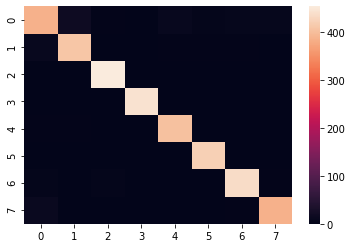


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       430
           1       0.95      0.96      0.96       425
           2       0.98      1.00      0.99       454
           3       1.00      1.00      1.00       442
           4       0.97      0.99      0.98       409
           5       0.98      1.00      0.99       421
           6       0.98      0.97      0.97       447
           7       0.98      0.96      0.97       402

    accuracy                           0.97      3430
   macro avg       0.97      0.97      0.97      3430
weighted avg       0.97      0.97      0.97      3430



In [57]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

print("Random Forest Classifier")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , rf_model.score(x_test, y_test))
print("train score " , rf_model.score(x_train, y_train))
print()
if abs((rf_model.score(x_train, y_train))-(rf_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")

print()

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

# 

In [58]:
from sklearn.tree import DecisionTreeClassifier

Decision Tree
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.9137026239067055
train score  1.0

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[340  28   8   0   9   8  20  17]
 [ 14 370   2   0   8   8  13  10]
 [  5   4 425   0   6   5   7   2]
 [  0   0   0 442   0   0   0   0]
 [  8  20   5   0 367   0   5   4]
 [  1   4   1   0   1 412   2   0]
 [ 10   4   5   0   5   4 414   5]
 [ 18   2   6   0   3   2   7 364]]


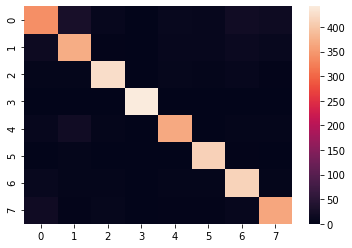


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       430
           1       0.86      0.87      0.86       425
           2       0.94      0.94      0.94       454
           3       1.00      1.00      1.00       442
           4       0.92      0.90      0.91       409
           5       0.94      0.98      0.96       421
           6       0.88      0.93      0.90       447
           7       0.91      0.91      0.91       402

    accuracy                           0.91      3430
   macro avg       0.91      0.91      0.91      3430
weighted avg       0.91      0.91      0.91      3430



In [59]:
decisiontree_model = DecisionTreeClassifier(criterion="gini")
decisiontree_model.fit(x_train,y_train)
y_pred = decisiontree_model.predict(x_test)

print("Decision Tree")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , decisiontree_model.score(x_test, y_test))
print("train score " , decisiontree_model.score(x_train, y_train))
print()
if abs((decisiontree_model.score(x_train, y_train))-(decisiontree_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")

print()

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

# 

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

Naive Bayes
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.4107871720116618
train score  0.3962759310172457

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[  0   1 104   0   0 311   0  14]
 [  0 187  79   0   0 154   5   0]
 [  0   0 380   0   0  74   0   0]
 [  0   0   0 442   0   0   0   0]
 [  0   0 176   0   0 233   0   0]
 [  0   0 105   0   0 316   0   0]
 [  0  29 224   0   0 190   4   0]
 [  0  25 143   0   0 148   6  80]]


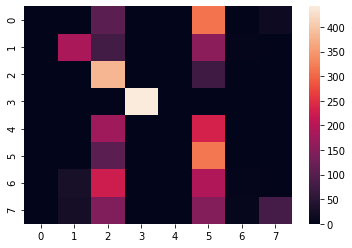


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       430
           1       0.77      0.44      0.56       425
           2       0.31      0.84      0.46       454
           3       1.00      1.00      1.00       442
           4       0.00      0.00      0.00       409
           5       0.22      0.75      0.34       421
           6       0.27      0.01      0.02       447
           7       0.85      0.20      0.32       402

    accuracy                           0.41      3430
   macro avg       0.43      0.40      0.34      3430
weighted avg       0.43      0.41      0.34      3430



In [61]:
gb_model = GaussianNB()
gb_model.fit(x_train,y_train)
y_pred = gb_model.predict(x_test)

print("Naive Bayes")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , gb_model.score(x_test, y_test))
print("train score " , gb_model.score(x_train, y_train))
print()
if abs((gb_model.score(x_train, y_train))-(gb_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")

print()

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

# 

### XGBOOST (Extreme Gradient Boosting) preforming very good compare to other classification models with 98% accuracy.

In [62]:
import joblib

In [65]:
joblib.dump(xgboost_model,"xgboostmodel1.pkl")

['xgboostmodel1.pkl']

# 

# 